In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_lebels = []
train_sample = []

Exam:

Exprerient drug was testes on 2100 peopes
who are 50% > 65 age and 50% < 65 age


In [4]:
for i in range(50):
    # the ~5% of Younger pepoles in who did exprience side effect of medicis
    random_young = randint(13,64)
    train_sample.append(random_young)
    train_lebels.append(1)

    # the ~5% of Older pepoles in who did exprience side effect of medicis
    random_older = randint(65,100)
    train_sample.append(random_older)
    train_lebels.append(0)

for i in range(1000):
        # the ~95% of Younger pepoles in who did not exprience side effect of medicis
    random_young = randint(13,64)
    train_sample.append(random_young)
    train_lebels.append(0)

    # the ~95% of Older pepoles in who did not exprience side effect of medicis
    random_older = randint(65,100)
    train_sample.append(random_older)
    train_lebels.append(1)
    
    

In [5]:
print(len(train_sample),train_sample[:5])
print(len(train_lebels),train_lebels[:5])

2100 [34, 91, 18, 94, 53]
2100 [1, 0, 1, 0, 1]


In [6]:
train_lebels = np.array(train_lebels)
train_sample = np.array(train_sample)
train_lebels , train_sample = shuffle(train_lebels , train_sample)

In [7]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_train_sample = scaler.fit_transform(train_sample.reshape(-1,1))
scaled_train_sample[:5]

array([[0.48275862],
       [0.27586207],
       [0.62068966],
       [0.29885057],
       [0.24137931]])

Creating Artificial Neural Network

In [9]:
import tensorflow as tf
from tensorflow import keras  
from tensorflow.keras.models import Sequential  # In a sequincial model
from tensorflow.keras.layers import Activation , Dense
from tensorflow.keras.optimizers import Adam  #Actitviation and optimize the data
from tensorflow.keras.metrics import categorical_crossentropy  #Cress_Categorical division

In [10]:
model = Sequential([
    Dense(units = 16 , input_shape = (1,) , activation = "relu"),
    Dense(units = 32 , activation = "relu"),
    Dense(units = 2 , activation = "softmax")])


C:\Jupyter\New folder\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

Training Model

In [13]:
model.compile(optimizer = Adam(learning_rate = 0.0001) , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [14]:
model.fit(x = scaled_train_sample , y = train_lebels , validation_split = 0.1 , batch_size = 10 , shuffle = True , epochs = 30 , verbose = 2)

Epoch 1/30
189/189 - 1s - 6ms/step - accuracy: 0.4614 - loss: 0.7084 - val_accuracy: 0.6000 - val_loss: 0.6841
Epoch 2/30
189/189 - 0s - 768us/step - accuracy: 0.5772 - loss: 0.6673 - val_accuracy: 0.6857 - val_loss: 0.6391
Epoch 3/30
189/189 - 0s - 759us/step - accuracy: 0.6778 - loss: 0.6268 - val_accuracy: 0.7143 - val_loss: 0.5994
Epoch 4/30
189/189 - 0s - 741us/step - accuracy: 0.7175 - loss: 0.5932 - val_accuracy: 0.7619 - val_loss: 0.5717
Epoch 5/30
189/189 - 0s - 755us/step - accuracy: 0.7550 - loss: 0.5642 - val_accuracy: 0.7714 - val_loss: 0.5461
Epoch 6/30
189/189 - 0s - 733us/step - accuracy: 0.7852 - loss: 0.5359 - val_accuracy: 0.7857 - val_loss: 0.5232
Epoch 7/30
189/189 - 0s - 752us/step - accuracy: 0.8042 - loss: 0.5087 - val_accuracy: 0.8000 - val_loss: 0.5010
Epoch 8/30
189/189 - 0s - 746us/step - accuracy: 0.8233 - loss: 0.4823 - val_accuracy: 0.8143 - val_loss: 0.4816
Epoch 9/30
189/189 - 0s - 743us/step - accuracy: 0.8397 - loss: 0.4570 - val_accuracy: 0.8333 - va

Bulding a test set and predicting

In [16]:
test_lebels = []
test_sample = []

In [17]:
for i in range(50):
    # the ~5% of Younger pepoles in who did exprience side effect of medicis
    random_young = randint(13,64)
    test_sample.append(random_young)
    test_lebels.append(1)

    # the ~5% of Older pepoles in who did exprience side effect of medicis
    random_older = randint(65,100)
    test_sample.append(random_older)
    test_lebels.append(0)

for i in range(1000):
        # the ~95% of Younger pepoles in who did not exprience side effect of medicis
    random_young = randint(13,64)
    test_sample.append(random_young)
    test_lebels.append(0)

    # the ~95% of Older pepoles in who did not exprience side effect of medicis
    random_older = randint(65,100)
    test_sample.append(random_older)
    test_lebels.append(1)
    
    

In [18]:
test_lebels = np.array(train_lebels)
test_sample = np.array(train_sample)
test_lebels , train_sample = shuffle(test_lebels , test_sample)

In [19]:
scaler = MinMaxScaler(feature_range = (0,1))
scaled_test_sample = scaler.fit_transform(test_sample.reshape(-1,1))
scaled_test_sample[:5]

array([[0.48275862],
       [0.27586207],
       [0.62068966],
       [0.29885057],
       [0.24137931]])

In [20]:
predicions = model.predict(x = scaled_test_sample , 
                           batch_size = 10,
                           verbose = 0)

In [21]:
print(predicions)

[[0.732909   0.26709095]
 [0.9414022  0.05859779]
 [0.3546964  0.6453036 ]
 ...
 [0.93854856 0.06145141]
 [0.94577074 0.05422928]
 [0.07767729 0.9223227 ]]


In [22]:
rounded_predicions = np.argmax(predicions , axis = 1)
rounded_predicions[:5]

array([0, 0, 1, 0, 0], dtype=int64)

#Confusion Matrices for Accuracy check

In [24]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [25]:
cm = confusion_matrix(y_true = test_lebels , y_pred = rounded_predicions)

In [26]:
def plot_confusion_matrix(cm , classes , normalize = False , title = 'confusion mattrix' , cmap = plt.cm.Blues):
    plt.imshow(cm , interpolation = 'nearest' , cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks , classes , rotation = 45)
    plt.yticks(tick_marks , classes)

    if normalize:
        cm = cm.astype('float')/cm.sum(axis = 1)[: , np.newaxis]
        print("Normalized confusion Matrix")
    else:
        print("Confusion Matrix without Normalized")
    print(cm)

    thresh = cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]) , range(cm.shape[1])):
        plt.text( j , i ,cm[i , j],
                horizontalalignment = "center",
                color = "red" if cm[i , j] > thresh else "green")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


    
    

In [27]:
cm_plot_labels = ["no_side_effects" , "had_side_effects"]

Confusion Matrix without Normalized
[[516 534]
 [499 551]]


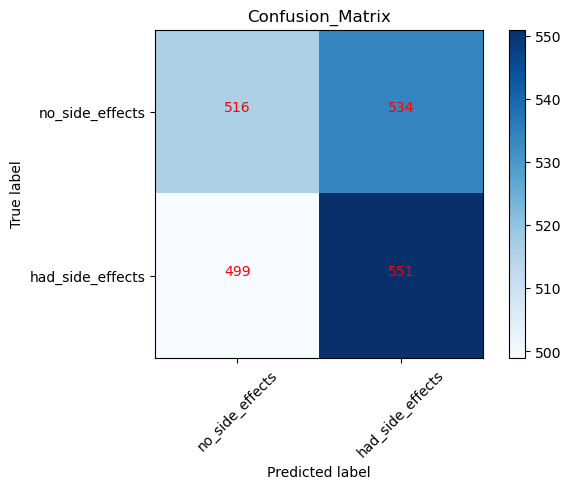

In [28]:
plot_confusion_matrix(cm = cm , classes = cm_plot_labels , title = "Confusion_Matrix")